In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from acquire import get_stores_data, get_sales_data, get_items_data, make_one_df, read_url_csv

## Using your store items data:

In [2]:
df = make_one_df()

In [3]:
df=df.drop(columns=['sale_id', 'store_id','item_id'])

In [4]:
df.head()

,item,sale_amount,sale_date,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Convert date column to datetime format.

In [10]:
df['sale_date'] = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date').sort_index()

AttributeError: 'DataFrame' object has no attribute 'sale_date'

Plot the distribution of sale_amount and item_price.

(array([1.41304e+05, 3.09995e+05, 2.32808e+05, 1.36482e+05, 6.28770e+04,
        2.25590e+04, 5.86500e+03, 1.00900e+03, 9.60000e+01, 5.00000e+00]),
 array([  0. ,  23.1,  46.2,  69.3,  92.4, 115.5, 138.6, 161.7, 184.8,
        207.9, 231. ]),
 <a list of 10 Patch objects>)

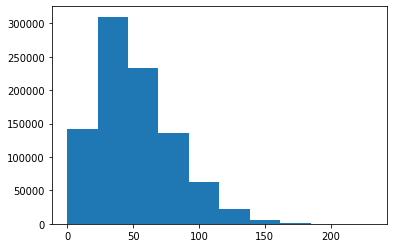

In [6]:
plt.hist(df.sale_amount)

(array([109560.,  54780., 109560.,  91300.,  54780., 127820.,  54780.,
        109560., 109560.,  91300.]),
 array([0.6  , 1.504, 2.408, 3.312, 4.216, 5.12 , 6.024, 6.928, 7.832,
        8.736, 9.64 ]),
 <a list of 10 Patch objects>)

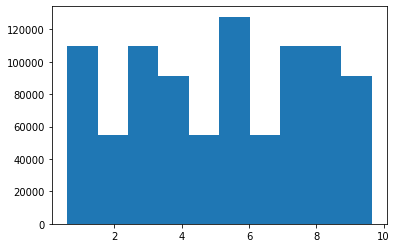

In [7]:
plt.hist(df.item_price)

Set the index to be the datetime variable.

In [9]:
#Convert sale_date to DateTimeIndex
df = df.set_index('sale_date').sort_index()

KeyError: "None of ['sale_date'] are in the columns"

Add a 'month' and 'day of week' column to your dataframe.

In [11]:
# Add Month to dataframe
df['month'] = df.index.month
# Add day of week to dataframe
df['weekday'] = df.index.day_name()

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [12]:
df['sales_total'] = (df.sale_amount * df.item_price)
df.head()

,item,sale_amount,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [14]:
def prep_store_df():
    """
    Function acquires dataframe from acquire and prepares the dataframe for time series analysis
    """
    df = make_one_df()
    df=df.drop(columns=['sale_id', 'store_id','item_id'])
    # Convert sale_date to DateTimeIndex
    df['sale_date'] = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Create calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 'store_id': object, 
                     'store_zipcode': object, 'item_id': object, 
                     'item_upc12': object, 'item_upc14': object, 
                     'month': 'category', 'weekday': 'category'}))
    return df

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_energy_df():
    """
    Function to acquires the csv from acquire and prepares the dataframe for time series analysis
    """
    df= make_opsd_csv()
    # Convert sale_date to DateTimeIndex
    df['Date'] = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Fill NaN
    df = df.fillna(0)
    
    # Display distributions of numeric columns
    numeric_hists(df)
    return df